## Where are you likely going to travel based on your recent history

## Import the necessary packages

In [148]:
%matplotlib inline
import sys
sys.path.append('/home/xavier/DIR.insight2018/')
from secret import API_KEY, API_SECRET
import flickrapi
import time
import datetime
from calendar import monthrange
import pickle
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
from country_list import countries_for_language
import unidecode # to remove accent on letters
from collections import Counter  # For the histogram
import matplotlib.pyplot as plt # For the histogram

flickr = flickrapi.FlickrAPI(API_KEY, API_SECRET, format='parsed-json')
#photos = flickr.walk(text='vacation',
#                     tag_mode='all',
#                     tags='cntower',
#                     extras='description,date_upload,date_taken,geo,tags,machine_tags,o_dims,views,url_s,url_m,url_l,url_o',
#                     media='photos',
#                     safe_search=1,
#                     content_type=1,
#                     per_page=50,
#                     has_geo=1,
#                     lat=43.6532,
#                     lon=-79.3832,
#                     radius=10)

#photos.__next__()
#x=photos.__next__()

In [30]:
#x.items()

In [2]:
#flickr.people.getInfo(user_id=flickr.people.findByUsername("APHendry1"))
x=flickr.people.findByUsername(username="APHendry1")

In [3]:
x['user']['nsid']

'83007471@N04'

In [33]:
#pge=1
#max_per_page_flickr = 500
#x=flickr.photos.search(tags="travel",per_page=max_per_page_flickr,page=pge)

In [34]:
#len(x['photos']['photo'])

## Deal with min and max date for the search

In [2]:
def unix_time_month_min(year,month):
    d = datetime.datetime(year,month,1,0,0,1)
    return int(time.mktime(d.timetuple()))
def unix_time_month_max(year,month):
    d = datetime.datetime(year,month,max(monthrange(year, month)),23,59,59)
    return int(time.mktime(d.timetuple()))
# [unix_time_month_min(2015,1),unix_time_month_max(2015,1)]

## Make a list of 20000 owner who use the tag 'travel'

In [43]:
## gave a 502 error
#list_user = {}
#max_per_page_flickr = 500
#for kw in ["travel", "vacation", "vacations", "holidays", "holiday", "travelling", "traveling","trip","sightseeing"]:
#    for y in range(2008,2018):
#        list_user["string{0}".format(y)]=[]
#        for m in range(1,13):
#            for pge in range(1,5):
#                x=flickr.photos.search(tags=kw,per_page=max_per_page_flickr,page=pge,
#                                       min_taken_date=unix_time_month_min(y,m),
#                                       max_taken_date=unix_time_month_max(y,m))
#                for i in range(len(x['photos']['photo'])):
#                    list_user["string{0}".format(y)].append(x['photos']['photo'][i]['owner'])

## Save the raw database to file

In [3]:
def clean_raw_db():
    raw_photos = pd.DataFrame(columns=['datetaken','description','latitude','longitude','owner','place_id','tags','title'])
    return raw_photos

def save_raw(n, raw_photos):
    file_n='raw_photos_'+str(n)+'.plk'
    with open(file_n, 'wb') as f:  # Python 3: open(..., 'wb')
        pickle.dump(raw_photos, f)
    return

In [4]:
max_per_page_flickr = 500
raw_photos =  clean_raw_db()
total_comb = 9*10*12*4
raw_photos = clean_raw_db()
error_log_call = pd.DataFrame(columns=['keyword','year','month','page'])
a=0
startTime = datetime.datetime.now()
for y in range(2008,2019):
    for kw in ["travel", "vacation", "vacations", "holidays", "holiday", "travelling", "traveling","trip","sightseeing"]:
        for m in range(1,13):
            for pge in range(1,5):
                a+=1
                try:
                    x=flickr.photos.search(tags=kw,per_page=max_per_page_flickr,page=pge,
                                       min_taken_date=unix_time_month_min(y,m),
                                       max_taken_date=unix_time_month_max(y,m),
                                       extras='description,date_upload,date_taken,geo,tags')
                    if len(x['photos']['photo']) > 1:
                        raw_photos = raw_photos.append(pd.DataFrame(x['photos']['photo'])
                                   [['datetaken','description','latitude','longitude','owner',
                                     'place_id','tags','title']],ignore_index=True)
                    if a % 10 == 0 : 
                        print(a/total_comb, '  in ', datetime.datetime.now()-startTime)
                except:
                    print('Exception reached in photo', kw, y, m, pge)
                    error_log_call = error_log_call.append(pd.DataFrame([[kw,y,m,pge]],columns=['keyword','year','month','page']),ignore_index=True)
                    pass   # This just means continue
    save_raw(y, raw_photos) # save a different file for every year
    del raw_photos
    raw_photos = clean_raw_db()
#                x=flickr.walk(tags=kw,per_page=max_per_page_flickr,extras='description,date_upload,date_taken,geo') #,
#                                       min_taken_date=unix_time_month_min(y,m),
#                                       max_taken_date=unix_time_month_max(y,m)) 
#                for i in range(len(x['photos']['photo'])):
#                    list_user.append(x['photos']['photo'][i]['owner'])
#                    year.append(y)
#                    month.append(m)
#                    photo_id.append(x['photos']['photo'][i]['id'])
#                    tmp=pd.DataFrame({'user':pd.Series([x['photos']['photo'][i]['owner']], dtype='str'),
#                                      'year':pd.Series([y], dtype='int'),
#                                      'month':pd.Series([m], dtype='int')})
#                    list_user=list_user.append(tmp,ignore_index=True)
print(datetime.datetime.now() - startTime)
# Roughly 3:30 hours run time

0.0023148148148148147   in  0:00:25.975331
0.004629629629629629   in  0:00:53.258458
0.006944444444444444   in  0:01:18.988816
0.009259259259259259   in  0:01:44.539139
0.011574074074074073   in  0:02:07.289122
0.013888888888888888   in  0:02:26.992817
0.016203703703703703   in  0:02:48.903824
0.018518518518518517   in  0:03:10.507155
0.020833333333333332   in  0:03:31.857581
0.023148148148148147   in  0:03:49.719534
0.02546296296296296   in  0:04:03.700636
0.027777777777777776   in  0:04:18.237909
0.03009259259259259   in  0:04:37.552300
0.032407407407407406   in  0:04:50.951152
0.034722222222222224   in  0:05:09.454485
0.037037037037037035   in  0:05:28.171064
0.03935185185185185   in  0:05:48.487281
0.041666666666666664   in  0:06:09.745400
0.04398148148148148   in  0:06:29.386339
0.046296296296296294   in  0:06:51.468916
0.04861111111111111   in  0:07:12.173957
0.05092592592592592   in  0:07:32.825287
0.05324074074074074   in  0:07:52.842374
0.05555555555555555   in  0:08:13.691910

0.4583333333333333   in  1:23:55.837161
0.46064814814814814   in  1:24:25.184512
0.46296296296296297   in  1:24:56.097834
0.4652777777777778   in  1:25:27.162533
0.4675925925925926   in  1:25:56.783426
0.4699074074074074   in  1:26:20.139856
0.4722222222222222   in  1:26:49.421044
0.47453703703703703   in  1:27:20.157779
0.47685185185185186   in  1:27:44.284812
0.4791666666666667   in  1:28:09.580915
0.48148148148148145   in  1:28:40.477272
0.4837962962962963   in  1:29:07.269493
0.4861111111111111   in  1:29:36.494191
0.48842592592592593   in  1:30:09.851391
0.49074074074074076   in  1:30:31.784304
0.4930555555555556   in  1:31:03.728434
0.49537037037037035   in  1:31:29.477794
0.4976851851851852   in  1:31:57.370814
0.5   in  1:32:15.176534
0.5023148148148148   in  1:32:47.856400
0.5046296296296297   in  1:33:21.501149
0.5069444444444444   in  1:33:58.748103
Exception reached in photo travel 2013 10 2
0.5092592592592593   in  1:34:29.505639
0.5115740740740741   in  1:35:01.114570
0.5

0.9189814814814815   in  3:00:38.753149
0.9212962962962963   in  3:01:10.161630
0.9236111111111112   in  3:01:29.987110
0.9259259259259259   in  3:01:40.037911
0.9282407407407407   in  3:02:02.875153
0.9305555555555556   in  3:02:19.516369
0.9328703703703703   in  3:02:30.231875
0.9351851851851852   in  3:02:53.336059
0.9375   in  3:03:21.890632
0.9398148148148148   in  3:03:52.299182
0.9421296296296297   in  3:04:20.467873
0.9444444444444444   in  3:05:02.535824
0.9467592592592593   in  3:05:29.617926
0.9490740740740741   in  3:05:59.624783
0.9513888888888888   in  3:06:27.819603
0.9537037037037037   in  3:06:53.233940
0.9560185185185185   in  3:07:20.235577
0.9583333333333334   in  3:07:49.853393
0.9606481481481481   in  3:08:20.347853
0.9629629629629629   in  3:08:50.027614
0.9652777777777778   in  3:09:21.111130
0.9675925925925926   in  3:09:45.345533
0.9699074074074074   in  3:10:12.723230
0.9722222222222222   in  3:10:43.379675
0.9745370370370371   in  3:11:14.731007
0.9768518518

In [7]:
with open('error_call.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(error_log_call, f)

In [4]:
with open('raw_photos_2008.plk', 'rb') as f:  # Python 3: open(..., 'rb')
    test =  pickle.load(f)
test

,datetaken,description,latitude,longitude,owner,place_id,tags,title
0,2008-01-20 15:37:44,{'_content': 'A fisherman in an outrigger boat...,-8.336127,115.658855,86423215@N00,LnBdURNUVLoEho3Qwg,bali eastbali sunrise beach jukung boat fisher...,"Amed, Bali Sunrise"
1,2008-01-25 20:56:22,{'_content': 'En un mundo tenebroso no hay som...,0,0,151456558@N06,NaN,dark world venezuela awesome arte admiration s...,Mundus Tenebras
2,2008-01-25 20:27:35,{'_content': 'En un mundo tenebroso no hay som...,0,0,151456558@N06,NaN,dark world venezuela awesome arte admiration s...,Mundus Tenebras
3,2008-01-25 20:35:27,{'_content': 'En un mundo tenebroso no hay som...,0,0,151456558@N06,NaN,dark world venezuela awesome arte admiration s...,Mundus Tenebras
4,2008-01-25 20:54:03,{'_content': 'En un mundo tenebroso no hay som...,0,0,151456558@N06,NaN,dark world venezuela awesome arte admiration s...,Mundus Tenebras
5,2008-01-26 13:29:59,{'_content': 'Summertime at the beach'},0,0,141836629@N07,NaN,australia scenic landscape seascape beach wate...,Gorgeous Beach Landscape
6,2008-01-04 12:45:00,{'_content': 'After two hours drive we stumble...,9.582977,77.621326,41119009@N00,csUakoxTWrNKcxMKcA,2008 madurai oochappan travel tamillifeculture...,La vie en Rose • Pudupatti
7,2008-01-19 14:32:16,{'_content': 'Este fuerte alberga a la Comanda...,0,0,34690494@N06,NaN,havana habana cuba cube fortaleza fortificatio...,Castillo de la Estación de Policía de La Haban...
8,2008-01-02 14:10:34,{'_content': 'elephant in Thailand'},0,0,159615760@N04,NaN,thailand outdoor baby park mammal green conser...,elephant in Thailand
9,2008-01-01 14:23:20,{'_content': 'Prasat Hin Phanom Rung in Burira...,0,0,159615760@N04,NaN,architecture temple stone thailand travel anci...,"Prasat Hin Phanom Rung in Buriram, #thailand ..."


## I loaded 2008 as a trial year
Now I need to extract the "destination" from either geotag, tag, title.

In [71]:
#test.iloc[31300:31350][['tags','title','description']]
#test[test['latitude']!=0]

## Add columns for "country from tag or title", "country from GPS", "city from title or tag", "city from GPS"

In [5]:
test["country_text"]=""
test["country_GPS"]=""
test["city_text"]=""
test["city_GPS"]=""
#test

## From GPS data

In [6]:
# Be careful -- limit of one request per second, 3600 per hour

geolocator = Nominatim(user_agent="test_insightToronto")
location = geolocator.reverse("-8.336127, 115.658855")
print(location.address)

Small shop, Jalan JI Ketuk Natih, Jemeluk, Bali, 80852, Indonesia


In [12]:
print(len(test[test['latitude']!=0]), ' out of ', len(test), 'have geotag', len(test[test['latitude']!=0])/len(test), "%")

print("This would require", round(len(test[test['latitude']!=0])/3600), ' hours')

66322  out of  195670 have geotag 0.3389482291613431 %
This would require 18  hours


## Focus on pulling city and country from tag, description, and title. 

In [131]:
def country_names():
    languages = ["en","fr","de","es"]
    b=[]
    for lang in languages:
        countries = dict(countries_for_language(lang))
        tmp=list(countries.values())
        b+=tmp
    lower_case = [x.lower() for x in b]
    decoded =  [unidecode.unidecode(x) for x in lower_case]
    return(decoded)
countries = country_names()

In [144]:
startTime = datetime.datetime.now()
for idx in range(len(test)):
    a=[test.iloc[idx][x] for x in ['tags','title','description']][:]
    #test.iloc[0][['tags','title','description']]
    tmp = a[0]+a[1]+str(list(a[2].values()))
    matches = [c for c in countries if c in tmp]
    if len(matches) > 0:
        test.iloc[idx]['country_text']=matches[0]
    if idx % 1000 == 0 :
        print(idx, ' of ', len(test))
print(datetime.datetime.now() - startTime)

0  of  195670
1000  of  195670
2000  of  195670
3000  of  195670
4000  of  195670
5000  of  195670
6000  of  195670
7000  of  195670
8000  of  195670
9000  of  195670
10000  of  195670
11000  of  195670
12000  of  195670
13000  of  195670
14000  of  195670
15000  of  195670
16000  of  195670
17000  of  195670
18000  of  195670
19000  of  195670
20000  of  195670
21000  of  195670
22000  of  195670
23000  of  195670
24000  of  195670
25000  of  195670
26000  of  195670
27000  of  195670
28000  of  195670
29000  of  195670
30000  of  195670
31000  of  195670
32000  of  195670
33000  of  195670
34000  of  195670
35000  of  195670
36000  of  195670
37000  of  195670
38000  of  195670
39000  of  195670
40000  of  195670
41000  of  195670
42000  of  195670
43000  of  195670
44000  of  195670
45000  of  195670
46000  of  195670
47000  of  195670
48000  of  195670
49000  of  195670
50000  of  195670
51000  of  195670
52000  of  195670
53000  of  195670
54000  of  195670
55000  of  195670
56000

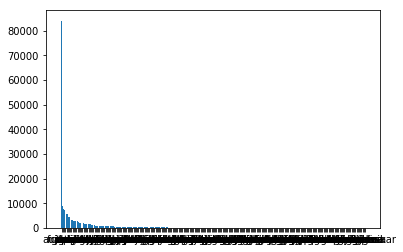

In [149]:
counts = Counter(test['country_text'])

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35

plt.bar(indexes, values)

# add labels
plt.xticks(indexes + bar_width, labels)
plt.show()

In [153]:
## 
pd.DataFrame(labels, values)

,0
84122,
8967,france
7553,australia
7370,italy
5695,india
5664,japan
4415,china
4258,spain
3304,mexico
2977,germany


In [6]:
with open('userList.plk', 'rb') as f:  # Python 3: open(..., 'rb')
    raw_photos =  pickle.load(f)

## Transform lists to a sorted panda data frame

In [17]:
tmp = {'User': list_user,
       'Month': month,
       'Year': year}
raw_user = pd.DataFrame(tmp)
raw_user.sort_values(by=['User'],inplace=True) # stort the list
raw_user.reset_index(drop=True,inplace=True)
#raw_user

,User,Month,Year
0,100001528@N06,7,2016
1,100001528@N06,7,2016
2,100001528@N06,7,2016
3,100001528@N06,7,2016
4,100001528@N06,7,2016
5,100001528@N06,7,2016
6,100001528@N06,7,2016
7,100001528@N06,7,2016
8,100001930@N07,6,2010
9,100002077@N08,4,2013


## Pick unique users who are present in more than one year


In [20]:
unique_user = {}
#a=0
#startTime = datetime.datetime.now()
# First entry
tmp_user=raw_user['User'][0]
tmp_list_year=[raw_user['Year'][0]]
n_row=len(raw_user['User'])
for i in range(1,n_row): # surf on the list grouped by user faster than doing search df['user'= user]
#    a+=1
    if tmp_user == raw_user['User'][i] :
        tmp_list_year.append(raw_user['Year'][i])
    else:
        set_tmp_list_year = set(tmp_list_year)
        if len(set_tmp_list_year) >1:
            unique_user[tmp_user] = set_tmp_list_year
        # Reset
        tmp_user=raw_user['User'][i]
        tmp_list_year=[raw_user['Year'][i]]
with open('unique_users.plk', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([unique_user], f)
#    if a % 1000 ==0 : print(a/n_row, 'in',  datetime.datetime.now()-startTime)
#set_tmp_list_year = set(tmp_list_year)
#if len(set_tmp_list_year) > 1:
#    unique_user[tmp_user] = set_tmp_list_year
## This is a 1min20 seconds process VS 4 hours for the procedure below

#unique_list = set(raw_user['User'])
#max_usr=len(unique_list)
#for user in unique_list:
#    x=set(raw_user[raw_user['User'] == user]['Year'])
#    length_x = len(x)
#    a +=1
#    if length_x > 1:
#        unique_user.update({'User': i,
#                            'n_years': length_x,
#                            'years': x})
#        
#    if a % 10 ==0 : print(a/max_usr, 'in',  datetime.datetime.now()-startTime)

In [23]:
with open('unique_user.plk', 'rb') as f:  # Python 3: open(..., 'rb')
    unique_user =  pickle.load(f)

In [22]:
raw_user.tail

<bound method NDFrame.tail of                   User  Month  Year
0        100001528@N06      7  2016
1        100001528@N06      7  2016
2        100001528@N06      7  2016
3        100001528@N06      7  2016
4        100001528@N06      7  2016
5        100001528@N06      7  2016
6        100001528@N06      7  2016
7        100001528@N06      7  2016
8        100001930@N07      6  2010
9        100002077@N08      4  2013
10       100002077@N08      4  2013
11       100002077@N08      4  2013
12       100002077@N08      4  2012
13       100002077@N08      4  2012
14       100002077@N08      4  2012
15       100002077@N08      4  2013
16       100002077@N08      4  2013
17       100002797@N05     10  2013
18       100002797@N05     10  2013
19       100005349@N03      5  2015
20       100005349@N03      8  2015
21       100005349@N03      8  2015
22       100005349@N03      8  2015
23       100005349@N03      8  2015
24       100005349@N03      8  2015
25       100005349@N03      8  201

In [16]:
len(list_user)

2000

In [57]:
[len(list_user) , len(set(list_user))]
uniqueUsers=set(list_user)
len(uniqueUsers)

88167

## Save the list of user who use the previous tag

In [116]:
with open('userList.plk', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([list_user,year,month], f)

## Getting back the objects:

In [10]:
with open('userList.plk', 'r') as f:  # Python 3: open(..., 'rb')
   tmp =  pickle.load(f)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

In [24]:
##sandbox
d={}
for x in range(1,10):
        d["string{0}".format(x)]=[]
        

In [25]:
d

{'string1': [],
 'string2': [],
 'string3': [],
 'string4': [],
 'string5': [],
 'string6': [],
 'string7': [],
 'string8': [],
 'string9': []}

In [26]:
d['string1'].append("bye")

In [76]:

list_user

,user,year,month
0,24391862@N06,2017,1
1,134867221@N07,2017,1
2,23985194@N06,2017,1
3,157852789@N03,2017,1
4,86855701@N08,2017,1
5,72616463@N00,2017,1
6,159251252@N07,2017,1
7,159251252@N07,2017,1
8,159251252@N07,2017,1
9,159251252@N07,2017,1


In [112]:
datetime.datetime.now()


datetime.datetime(2018, 9, 16, 22, 59, 37, 856464)

In [106]:
x.append('allo')

In [114]:
list_user

['86423215@N00',
 '141836629@N07',
 '41119009@N00',
 '34690494@N06',
 '159615760@N04',
 '159615760@N04',
 '159615760@N04',
 '159615760@N04',
 '159615760@N04',
 '159615760@N04',
 '159615760@N04',
 '141836629@N07',
 '142710016@N02',
 '142710016@N02',
 '142710016@N02',
 '142710016@N02',
 '141487081@N02',
 '141487081@N02',
 '61456446@N06',
 '61456446@N06',
 '61456446@N06',
 '61456446@N06',
 '61456446@N06',
 '61456446@N06',
 '61456446@N06',
 '61456446@N06',
 '27004296@N03',
 '27964309@N06',
 '159544363@N04',
 '141487081@N02',
 '133926410@N03',
 '7156765@N05',
 '8398907@N02',
 '41119009@N00',
 '41119009@N00',
 '41119009@N00',
 '37041050@N03',
 '48284565@N04',
 '48284565@N04',
 '48489192@N06',
 '48489192@N06',
 '41119009@N00',
 '41119009@N00',
 '41119009@N00',
 '41119009@N00',
 '7156765@N05',
 '21728312@N03',
 '21728312@N03',
 '32852605@N03',
 '41119009@N00',
 '17904502@N00',
 '7156765@N05',
 '145472109@N04',
 '145472109@N04',
 '145472109@N04',
 '144005928@N02',
 '35232195@N06',
 '62887986@N0